<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-a-super-smart-search-engine-over-any-free-text-data-source" data-toc-modified-id="Create-a-super-smart-search-engine-over-any-free-text-data-source-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create a super smart search engine over any free text data source</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Load data and create DF</a></span></li><li><span><a href="#Preprocess-and-tokenise" data-toc-modified-id="Preprocess-and-tokenise-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Preprocess and tokenise</a></span></li><li><span><a href="#Fast-text" data-toc-modified-id="Fast-text-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Fast text</a></span></li><li><span><a href="#Load-fasttext-and-query" data-toc-modified-id="Load-fasttext-and-query-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Load fasttext and query</a></span></li><li><span><a href="#Creating-BM25-document-vectors:" data-toc-modified-id="Creating-BM25-document-vectors:-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Creating BM25 document vectors:</a></span></li><li><span><a href="#Load-document-vectors,-build-index-and-search:" data-toc-modified-id="Load-document-vectors,-build-index-and-search:-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Load document vectors, build index and search:</a></span></li><li><span><a href="#Load-data-and-create-DF" data-toc-modified-id="Load-data-and-create-DF-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>Load data and create DF</a></span></li><li><span><a href="#Preprocess-and-tokenise" data-toc-modified-id="Preprocess-and-tokenise-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>Preprocess and tokenise</a></span></li><li><span><a href="#Fast-text" data-toc-modified-id="Fast-text-1.0.9"><span class="toc-item-num">1.0.9&nbsp;&nbsp;</span>Fast text</a></span></li><li><span><a href="#Load-fasttext-and-query" data-toc-modified-id="Load-fasttext-and-query-1.0.10"><span class="toc-item-num">1.0.10&nbsp;&nbsp;</span>Load fasttext and query</a></span></li><li><span><a href="#Creating-BM25-document-vectors:" data-toc-modified-id="Creating-BM25-document-vectors:-1.0.11"><span class="toc-item-num">1.0.11&nbsp;&nbsp;</span>Creating BM25 document vectors:</a></span></li><li><span><a href="#Load-document-vectors,-build-index-and-search:" data-toc-modified-id="Load-document-vectors,-build-index-and-search:-1.0.12"><span class="toc-item-num">1.0.12&nbsp;&nbsp;</span>Load document vectors, build index and search:</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
from gensim.models.fasttext import FastText
# !pip install rank_bm25 --quiet #install BM25
# !pip install --no-binary :all: nmslib #install nmslib
from rank_bm25 import BM25Okapi
import nmslib
import time
from google.colab import drive

# drive.mount('/content/drive') # if you want to use G Drive
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')


/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Load data

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi
from platform import python_version
print(python_version())

3.7.7


In [27]:
transcript_list_20_04_15 = YouTubeTranscriptApi.list_transcripts('wCaDb78vOtY') # apr 15 --> 1
transcript_list_20_04_20 = YouTubeTranscriptApi.list_transcripts('9uh2Zq7rpWI') # apr 20 --> 2
transcript_list_20_04_22 = YouTubeTranscriptApi.list_transcripts('67ohvRQJclo') # apr 22 --> 3
transcript_list_20_04_27 = YouTubeTranscriptApi.list_transcripts('xb2GM1EiZco') # apr 27 --> 4
transcript_list_20_05_04 = YouTubeTranscriptApi.list_transcripts('CPErAd9ZEMY') # may 4 --> 5
transcript_list_20_05_11 = YouTubeTranscriptApi.list_transcripts('txP6dO0i_4I') # may 11 --> 6
transcript_list_20_05_18 = YouTubeTranscriptApi.list_transcripts('O_wMUvFxqh0') # may 18 --> 7
transcript_list_20_06_01 = YouTubeTranscriptApi.list_transcripts('mLg8txbrh18') # jun 1 --> 8
transcript_list_20_06_08 = YouTubeTranscriptApi.list_transcripts('AdMHXOIM3wc') # jun 8 --> 9
transcript_list_20_06_15 = YouTubeTranscriptApi.list_transcripts('_4fsBL5R4rA') # jun 15 -->10
transcript_list_20_06_29 = YouTubeTranscriptApi.list_transcripts('s9UBbpJ5_yY') # jun 29 --> 11
transcript_list_20_07_13 = YouTubeTranscriptApi.list_transcripts('FBuHAY2Q6iE') # jul 13 --> 12
transcript_list_20_07_20 = YouTubeTranscriptApi.list_transcripts('Pvv_5u-JgkU') # jul 20 --> 13
transcript_list_20_07_27 = YouTubeTranscriptApi.list_transcripts('6KTqHoZ5yF0') # jul 27 --> 14
transcript_list_20_08_03 = YouTubeTranscriptApi.list_transcripts('iBx5-XE2jWo') # aug 3 --> 15
transcript_list_20_08_10 = YouTubeTranscriptApi.list_transcripts('N9sFlng3z6M') # aug 10 --> 16
transcript_list_20_08_17 = YouTubeTranscriptApi.list_transcripts('727l1vOlXhA') # aug 17 --> 17
transcript_list_20_08_24 = YouTubeTranscriptApi.list_transcripts('B9EV7x1Vv-c') # aug 24 --> 18
transcript_list_20_08_31 = YouTubeTranscriptApi.list_transcripts('4uGpiZSZ0Xk') # aug 31 --> 19
transcript_list_20_09_14 = YouTubeTranscriptApi.list_transcripts('3fOkP7nNajw') # sep 14 --> 20
transcript_list_20_09_21 = YouTubeTranscriptApi.list_transcripts('w2-SNHvH-QM') # sep 21 --> 21
transcript_list_20_09_28 = YouTubeTranscriptApi.list_transcripts('21FeT1Z_ntg') # sep 28 --> 22
transcript_list_20_10_05 = YouTubeTranscriptApi.list_transcripts('TpgQnORqnpc') # oct 5 --> 23
transcript_list_20_10_12 = YouTubeTranscriptApi.list_transcripts('SXgs5iXN2jE') # oct 12 --> 24
transcript_list_20_10_26 = YouTubeTranscriptApi.list_transcripts('fIW_6SrhhJo') # oct 26 --> 25
transcript_list_20_11_02 = YouTubeTranscriptApi.list_transcripts('if9ybN6SzdU') # nov 2 --> 26
transcript_list_20_11_09 = YouTubeTranscriptApi.list_transcripts('rD6xN51EvLI') # nov 9 --> 27
transcript_list_20_11_16 = YouTubeTranscriptApi.list_transcripts('aj4wCjhU25E') # nov 16  --> 28
transcript_list_20_11_30 = YouTubeTranscriptApi.list_transcripts('Tl9xdBbEWtU') # nov 30 --> 29
transcript_list_20_12_07 = YouTubeTranscriptApi.list_transcripts('Kp5--a_Or40') # dec 7 --> 30
transcript_list_20_12_14 = YouTubeTranscriptApi.list_transcripts('O5Y1tZtcA-I') # dec 14 -->31
transcript_list_20_12_21 = YouTubeTranscriptApi.list_transcripts('G5yQOSZs228') # dec 21 --> 32
transcript_list_21_01_04 = YouTubeTranscriptApi.list_transcripts('XwG1WVErygE') # jan 4 --> 33
transcript_list_21_01_11 = YouTubeTranscriptApi.list_transcripts('yvehrgqsdVg') # jan 11 --> 34
transcript_list_21_01_25 = YouTubeTranscriptApi.list_transcripts('eoxCOMH2e6U') # jan 25 --> 35
transcript_list_21_02_01 = YouTubeTranscriptApi.list_transcripts('k3WnSt7Q8u4') # feb 1 --> 36
transcript_list_21_02_08 = YouTubeTranscriptApi.list_transcripts('MgU9O8tWQjQ') # feb 8 --> 37
transcript_list_21_02_15 = YouTubeTranscriptApi.list_transcripts('olwBArtWj30') # feb 15 --> 38
transcript_list_21_02_22 = YouTubeTranscriptApi.list_transcripts('kSki_k4eYYk') # feb 22 --> 39
transcript_list_21_03_08 = YouTubeTranscriptApi.list_transcripts('6j4ksYnvhv4') # mar 8 --> 40
transcript_list_21_03_15 = YouTubeTranscriptApi.list_transcripts('Ph6aHWAVe3g') # mar 15 --> 41
transcript_list_21_03_22 = YouTubeTranscriptApi.list_transcripts('H1KeNsiVALc') # mar 22 --> 42
transcript_list_21_03_29 = YouTubeTranscriptApi.list_transcripts('MQ77n9-QikQ') # mar 29 --> 43
transcript_list_21_04_05 = YouTubeTranscriptApi.list_transcripts('wvSDW0T1cNk') # apr 5 --> 44
transcript_list_21_04_12 = YouTubeTranscriptApi.list_transcripts('4KhsoymQ1zM') # apr 12 --> 45
transcript_list_21_04_19 = YouTubeTranscriptApi.list_transcripts('LvKtcDJBySk') # apr 19 --> 46
transcript_list_21_04_26 = YouTubeTranscriptApi.list_transcripts('alcK8CuBkM4') # apr 26 --> 47
transcript_list_21_05_10 = YouTubeTranscriptApi.list_transcripts('7PRCqtNmGBc') # may 10 --> 48

transcript_list=zip(
                   transcript_list_20_04_15, transcript_list_20_04_20, transcript_list_20_04_22, 
                    transcript_list_20_04_27, transcript_list_20_05_04, transcript_list_20_05_11,
                    transcript_list_20_05_18, transcript_list_20_06_01, transcript_list_20_06_08, transcript_list_20_06_15, 
                    transcript_list_20_06_29, transcript_list_20_07_13, transcript_list_20_07_20, 
                    transcript_list_20_07_27, transcript_list_20_08_03, transcript_list_20_08_10, 
                    transcript_list_20_08_17, transcript_list_20_08_24 , transcript_list_20_08_31, 
                    transcript_list_20_09_14, transcript_list_20_09_21,  transcript_list_20_09_28,
                    transcript_list_20_10_05, transcript_list_20_10_12, transcript_list_20_10_26,
                    transcript_list_20_11_02,
                    transcript_list_20_11_09, transcript_list_20_11_16, transcript_list_20_11_30,
                    transcript_list_20_12_07, transcript_list_20_12_14, transcript_list_20_12_21,
                    transcript_list_21_01_04, transcript_list_21_01_11, transcript_list_21_01_25,
                    transcript_list_21_02_01, transcript_list_21_02_08, transcript_list_21_02_15,
                    transcript_list_21_02_22, transcript_list_21_03_08, transcript_list_21_03_15,
                    transcript_list_21_03_22, transcript_list_21_03_29, transcript_list_21_04_05,
                    transcript_list_21_04_12, transcript_list_21_04_19, transcript_list_21_04_26, transcript_list_21_05_10)


In [28]:
from datetime import timedelta

trans_list = []
time = []
date_list=[]

# transcript_list=ziptranscript_list=zip(
#                    transcript_list_20_04_15 , transcript_list_20_04_20, transcript_list_20_04_22, 
#                     transcript_list_20_04_27, transcript_list_20_05_04)

# date = ['4/5/2020', '4/20/2020', '4/22/2020', '4/27/2020', '5/4/2020']
date=['4/15/2020', '4/20/2020', '4/22/2020', 
                              '4/27/2020', '5/4/2020', '5/11/2020', '5/18/2020', '6/1/2020', '6/8/2020', 
                            '6/15/2020', '6/29/2020', '7/13/2020', '7/20/2020', '7/27/2020', 
                              '8/3/2020', '8/10/2020', '8/17/2020', '8/24/2020', '8/31/2020',
                            '9/14/2020', '9/21/2020',  '9/28/2020', '10/5/2020', '10/20/2020',
                             '10/26/2020', '11/2/2020', '11/9/2020',
                             '11/16/2020', '11/30/2020', '12/7/2020', 
                              '12/14/2020', '12/21/2020', '1/4/2021',
                             '1/11/2021', '1/25/2021', '2/1/2021', 
                              '2/8/2021', '2/15/2021', '2/22/2021',
                             '3/8/2021', '3/15/2021', '3/22/2021', 
                              '3/29/2021', '4/5/2021', '4/12/2021',
                             '4/19/2021', '4/26/2021', '5/10/2021']

for transcript in transcript_list:
    for i in range(48):
        trans=transcript[i].fetch()
        temp=[]
        day=date[i]
        print(day)
        for x in range(len(trans)):            
            temp.append(trans[x]['text'])
        joined = " ".join(temp)
        trans_list.append(joined)      
        date_list.append(day)


4/15/2020
4/20/2020
4/22/2020
4/27/2020
5/4/2020
5/11/2020
5/18/2020
6/1/2020
6/8/2020
6/15/2020
6/29/2020
7/13/2020
7/20/2020
7/27/2020
8/3/2020
8/10/2020
8/17/2020
8/24/2020
8/31/2020
9/14/2020
9/21/2020
9/28/2020
10/5/2020
10/20/2020
10/26/2020
11/2/2020
11/9/2020
11/16/2020
11/30/2020
12/7/2020
12/14/2020
12/21/2020
1/4/2021
1/11/2021
1/25/2021
2/1/2021
2/8/2021
2/15/2021
2/22/2021
3/8/2021
3/15/2021
3/22/2021
3/29/2021
4/5/2021
4/12/2021
4/19/2021
4/26/2021
5/10/2021


In [72]:
from pandas import DataFrame
df = pd.DataFrame(trans_list,columns=['text'])
df['time'] = pd.DataFrame(time,columns=['time'])
df['date'] = pd.DataFrame(date_list,columns=['date'])

In [30]:
df.shape

(48, 3)

In [31]:
df.head(1)

text  \
0  okay look at your list no it's dinner i'm actually on page 29 of 35 previously we are going off of this now so i need to get rid of the rest some of it don't freak out um yes um hello everybody i'm here hey nestor it's carla good afternoon everyone welcome to the covid19 infectious disease office hours we're very excited to see everybody here today and welcome to those who've been before and welcome to any new participants as well just a couple of housekeeping announcement announcements before we get started um for those of you who are familiar with project echo we really like to our one of our goals is building community and so we really like to see people's faces so if you do not have if you have a camera and don't have it on we would love for you to turn it on and keep it on during the session if possible we would ask that people keep themselves muted unless they're called on by one of the facilitators we will try as always to answer all the questions that were submitted through the registration and we will also we would also love to hear your questions on the chat so if you have a question during this session please um enter it into the chat box and we'll try to get to those as well um a couple of other things we have a digital librarian who's amazing and and during this process uh during the entire session he'll be putting some links into the chat based on questions that come in so you can always look at the chat too to find more information because of many of you know there's been a lot of security issues with zinc with um zoom lately so we can't actually put hyperlinks in the chat anymore so if you want to go to one of those links you have to copy and paste them and put them into your own web browser and lastly our website is being updated all the time with videos of the sessions and other resources so please please go to that if you want more information okay so i'm going to go ahead and get started i'm going to do a couple of introductions and then i'll ask one question then and turn it over to joanna um i want to introduce our uh office hours with nester sosa who's our chief of uh the division of infectious diseases here at the university of new mexico and he is generously offered his to do this three times a week so we really appreciate it and he's been busy sort of on the front lines and has a lot of good information so nestor i'll have you introduce yourself in just a minute and just give us a little update on anything that you think is important for the group to know and i also want to introduce my colleague joanna katzman who is one of the senior associate directors here at project echo and we work closely together she'll be helping to moderate the question question and answer section so nestor why don't you go ahead and unmute yourself and please say a few words if you will sure thank you thank you very much carla and thank thank you everybody for one more time connecting and sending those uh excellent questions i think um really on the on the research front we we're starting to see um a couple of publications um a little bit you know debunking the the hope that we have with hydroxychloroquine there was a publication from brazil that actually showed uh increased toxicity when they use the the original molecule the chloroquine molecule especially cardiac toxicity and there is a pre-publication that is going to come out in the british medical journal of probably one of the first comparative trial of hydroxyl chloroquine versus control or placebo and it showed no benefit um and these were close to 180 181 subjects so so i think um we're probably going to be looking into other uh other uh products like rendezvous or maybe the convalescent plasma as some hope for for uh for a useful therapeutic intervention but i think soon we're going to have to be revising the recommendations and and protocols in many of the centers um here in the us uh in you know in view of these uh these results and then we you know 

In [73]:
df.to_csv('../data/echo_test.csv',header=True)

In [74]:
df = pd.read_csv ('../data/echo_test.csv', usecols= ['text','date'])
df.head(1)

text  \
0  okay look at your list no it's dinner i'm actually on page 29 of 35 previously we are going off of this now so i need to get rid of the rest some of it don't freak out um yes um hello everybody i'm here hey nestor it's carla good afternoon everyone welcome to the covid19 infectious disease office hours we're very excited to see everybody here today and welcome to those who've been before and welcome to any new participants as well just a couple of housekeeping announcement announcements before we get started um for those of you who are familiar with project echo we really like to our one of our goals is building community and so we really like to see people's faces so if you do not have if you have a camera and don't have it on we would love for you to turn it on and keep it on during the session if possible we would ask that people keep themselves muted unless they're called on by one of the facilitators we will try as always to answer all the questions that were submitted through the registration and we will also we would also love to hear your questions on the chat so if you have a question during this session please um enter it into the chat box and we'll try to get to those as well um a couple of other things we have a digital librarian who's amazing and and during this process uh during the entire session he'll be putting some links into the chat based on questions that come in so you can always look at the chat too to find more information because of many of you know there's been a lot of security issues with zinc with um zoom lately so we can't actually put hyperlinks in the chat anymore so if you want to go to one of those links you have to copy and paste them and put them into your own web browser and lastly our website is being updated all the time with videos of the sessions and other resources so please please go to that if you want more information okay so i'm going to go ahead and get started i'm going to do a couple of introductions and then i'll ask one question then and turn it over to joanna um i want to introduce our uh office hours with nester sosa who's our chief of uh the division of infectious diseases here at the university of new mexico and he is generously offered his to do this three times a week so we really appreciate it and he's been busy sort of on the front lines and has a lot of good information so nestor i'll have you introduce yourself in just a minute and just give us a little update on anything that you think is important for the group to know and i also want to introduce my colleague joanna katzman who is one of the senior associate directors here at project echo and we work closely together she'll be helping to moderate the question question and answer section so nestor why don't you go ahead and unmute yourself and please say a few words if you will sure thank you thank you very much carla and thank thank you everybody for one more time connecting and sending those uh excellent questions i think um really on the on the research front we we're starting to see um a couple of publications um a little bit you know debunking the the hope that we have with hydroxychloroquine there was a publication from brazil that actually showed uh increased toxicity when they use the the original molecule the chloroquine molecule especially cardiac toxicity and there is a pre-publication that is going to come out in the british medical journal of probably one of the first comparative trial of hydroxyl chloroquine versus control or placebo and it showed no benefit um and these were close to 180 181 subjects so so i think um we're probably going to be looking into other uh other uh products like rendezvous or maybe the convalescent plasma as some hope for for uh for a useful therapeutic intervention but i think soon we're going to have to be revising the recommendations and and protocols in many of the centers um here in the us uh in you know in view of these uh these results and then we you know 

### Preprocess and tokenise

In [32]:
import ftfy

# tokenise and do some cleaning: remove punctuation, white space 
# and convert the text to lowercase

nlp = spacy.load("en_core_web_sm")
tok_text=[] # for our tokenised corpus
text = df.text.str.lower().values
text = [ftfy.fix_text(str(i)) for i in text] # change bad unicode with good unicode

#Tokenising using SpaCy:
for doc in tqdm(nlp.pipe(text, n_threads=2, disable=["tagger", "parser","ner"])):
    tok = [t.text for t in doc if (t.is_ascii and not t.is_punct and not t.is_space)]
    tok_text.append(tok)


48it [00:00, 64.53it/s]


### Fast text

In [33]:
# create word vectors with FastText
from gensim.models.fasttext import FastText

ft_model = FastText(
    sg=1, # use skip-gram: usually gives better results
    size=100, # embedding dimension (default)
    window=10, # window size: 10 tokens before and 10 tokens after to get wider context
    min_count=5, # only consider tokens with at least n occurrences in the corpus
    negative=15, # negative subsampling: bigger than default to sample negative examples more
    min_n=2, # min character n-gram
    max_n=5 # max character n-gram
)

ft_model.build_vocab(tok_text)

ft_model.train(
    tok_text,
    epochs=6,
    total_examples=ft_model.corpus_count, 
    total_words=ft_model.corpus_total_words)

ft_model.save('_fasttext_echo.model2')

### Load fasttext and query

In [34]:
ft_model = FastText.load('_fasttext_echo.model2')

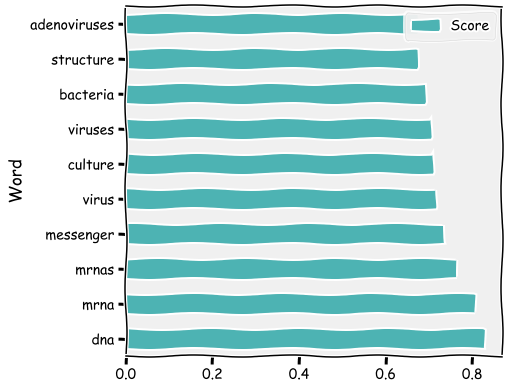

In [35]:
with plt.xkcd():
    pd.DataFrame(ft_model.wv.most_similar("rna", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=(0.3,0.7,0.7))

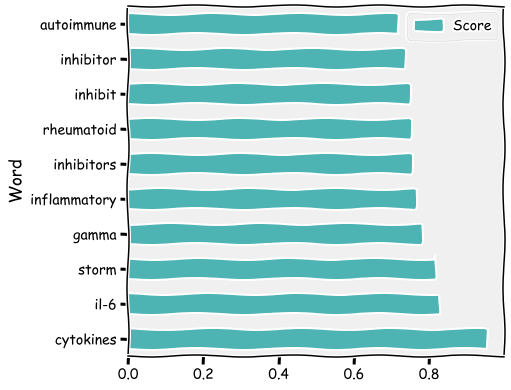

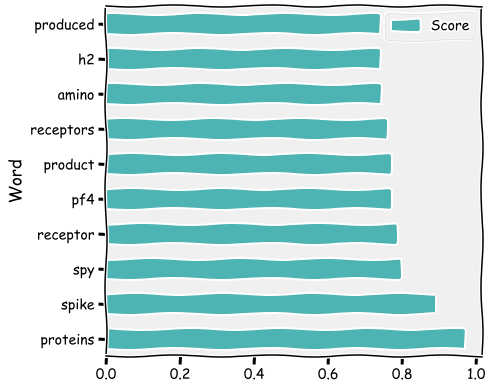

In [60]:
with plt.xkcd():
    pd.DataFrame(ft_model.wv.most_similar("cytokine", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=(0.3,0.7,0.7))
    pd.DataFrame(ft_model.wv.most_similar("protein", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=(0.3,0.7,0.7))    

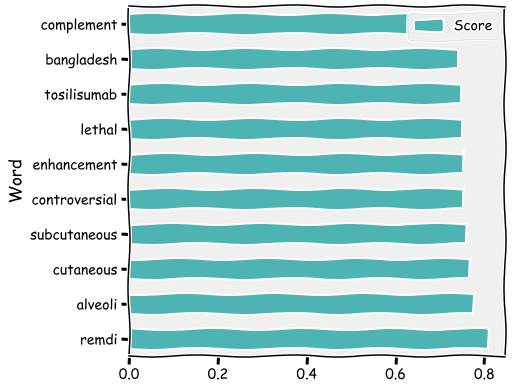

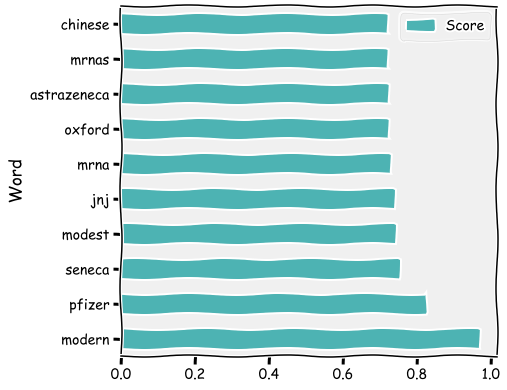

In [81]:
with plt.xkcd():
    pd.DataFrame(ft_model.wv.most_similar("remdesivir", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=(0.3,0.7,0.7))
# with plt.xkcd():
    pd.DataFrame(ft_model.wv.most_similar("moderna", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=(0.3,0.7,0.7))

### Creating BM25 document vectors:

In [38]:
bm25 = BM25Okapi(tok_text)
weighted_doc_vects = []

for i,doc in tqdm(enumerate(tok_text)):
    doc_vector = []
    for word in doc:
        vector = ft_model[word]
        weight = (bm25.idf[word] * ((bm25.k1 + 1.0)*bm25.doc_freqs[i][word])) 
        / 
        (bm25.k1 * (1.0 - bm25.b + bm25.b *(bm25.doc_len[i]/bm25.avgdl))+bm25.doc_freqs[i][word])
        weighted_vector = vector * weight
        doc_vector.append(weighted_vector)
    doc_vector_mean = np.mean(doc_vector,axis=0)
    weighted_doc_vects.append(doc_vector_mean)

0it [00:00, ?it/s]/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
48it [00:04, 11.96it/s]


In [39]:
pickle.dump( weighted_doc_vects, open( "weighted_doc_vects_ECHO2.p", "wb" ) )

### Load document vectors, build index and search:

In [40]:
with open( "weighted_doc_vects_ECHO2.p", "rb" ) as f:
    weighted_doc_vects = pickle.load(f)
# create a random matrix to index
data = np.vstack(weighted_doc_vects)

# initialize a new index, using a HNSW index on Cosine Similarity 
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(data)
index.createIndex({'post': 2}, print_progress=True)

In [59]:
# querying the index:
input = 'cytokine'.lower().split()

query = [ft_model[vec] for vec in input]
query = np.mean(query,axis=0)

# t0 = time.time()
ids, distances = index.knnQuery(query, k=5)
# t1 = time.time()
print(f'Searched {df.shape[0]} records \n')
print('------------------------------------')
for i,j in zip(ids,distances):
    print(f'Date: {df.date.values[i]}')
#     print(f'Text: "{df.text.values[i]}"')  
    print(round(j,2))
    print('------------------------------------')


Searched 48 records 

------------------------------------
Date: 2/22/2021
0.58
------------------------------------
Date: 9/21/2020
0.58
------------------------------------
Date: 6/15/2020
0.59
------------------------------------
Date: 8/24/2020
0.59
------------------------------------
Date: 5/11/2020
0.59
------------------------------------


/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [42]:
# querying the index:
input = 'moderna'.lower().split()


query = [ft_model[vec] for vec in input]
query = np.mean(query,axis=0)

# t0 = time.time()
ids, distances = index.knnQuery(query, k=5)
# t1 = time.time()
print(f'Searched {df.shape[0]} records \n')
print('------------------------------------')
for i,j in zip(ids,distances):
    print(f'Date: {df.date.values[i]}')
    print(f'Text: "{df.text.values[i]}"')    
    print(round(j,2))
    print('------------------------------------')


Searched 48 records 

------------------------------------
Date: 12/14/2020
Text: "everybody can you hear me okay great thank you well welcome everybody to our monday office hours infectious disease echo i'm joanna katzman i want to get started right away and wanted to remind everybody that if you have a video camera and you're able to turn it on please do so it allows us to be able to see you and we can kind of see each other and it's uh more bi-directional and in line with the echo model that would be fantastic i would like to introduce my colleague carla thornton carla do you want to say hi sure thank you joanna i'm carla thornton infectious diseases here at unm thank you thanks carlin carla will be asking some questions a little in a little bit but i want to get right to we have presentations from our leader dr nester sosa who's the division chief of infectious diseases at university of new mexico um dr sosa has a presentation uh followed by that of leslie hayes and then we've got 

/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
